# Project: Investigate a Dataset - [Soccer-Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables.
#### Tables
    Country
    League
    Match
    Player
    Player Attributes
    Team
    Team Attributes
    
#### Columns
> **Country**: [id, name]
    
> **League**: [id, country_id, name]
    
> **Match**: [id, country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, 
            home_team_goal, away_team_goal, home_player_X1, home_player_X2, home_player_X3, home_player_X4,
            home_player_X5, home_player_X6, home_player_X7, home_player_X8, home_player_X9, home_player_X10,
            home_player_X11, away_player_X1, away_player_X2, away_player_X3, away_player_X4, away_player_X5,
            away_player_X6, away_player_X7, away_player_X8, away_player_X9, away_player_X10, away_player_X11,
            home_player_Y1, home_player_Y2, home_player_Y3, home_player_Y4, home_player_Y5, home_player_Y6,
            home_player_Y7, home_player_Y8, home_player_Y9, home_player_Y10, home_player_Y11, away_player_Y1,
            away_player_Y2, away_player_Y3, away_player_Y4, away_player_Y5, away_player_Y6, away_player_Y7,
            away_player_Y8, away_player_Y9, away_player_Y10, away_player_Y11, home_player_1, home_player_2,
            home_player_3, home_player_4, home_player_5, home_player_6, home_player_7, home_player_8, home_player_9,
            home_player_10, home_player_11, away_player_1, away_player_2, away_player_3, away_player_4, away_player_5,
            away_player_6, away_player_7, away_player_8, away_player_9, away_player_10, away_player_11, goal, shoton,
            shotoff, foulcommit, card, cross, corner, possession, B365H, B365D, B365A, BWH, BWD, BWA, IWH, IWD, IWA,
            LBH, LBD, LBA, PSH, PSD, PSA, WHH, WHD, WHA, SJH, SJD, SJA, VCH, VCD, VCA, GBH, GBD, GBA, BSH, BSD, BSA]
            
            Note:   The columns (goal, shoton, shotoff, foulcommit, card, cross, corner, possession) contain XML
                    strings and therefore require the xml-library to unravel their information. I'll only be working
                    with the goal column.
            
> **Player**: [id, player_api_id, player_name, palyer_fifa_api_id, birthday, height, weight]
    
> **Player Attributes**: [id, player_fifa_api_id, player_api_id, date, overall_rating, potential, preferred_foot,
                        attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing,
                        volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration,
                        sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots,
                        aggression, interceptions, positioning, vision, penalties, marking, standing_tackle,
                        sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes]
                        
> **Team**: [id, team_api_id, team_fifa_api_id, team_long_name, team_short_name]
    
> **Team Attributes**: [id, team_fifa_api_id, team_api_id, date, buildUpPlaySpeed, buildUpPlaySpeedClass,
                      buildUpPlayDribbling, buildUpPlayDribblingClass, buildUpPlayPassing, buildUpPlayPassingClass,
                      buildUpPlayPositioningClass, chanceCreationPassing, chanceCreationPassingClass,
                      chanceCreationCrossing, chanceCreationCrossingClass, chanceCreationShooting,
                      chanceCreationShootingClass, chanceCreationPositioningClass, defencePressure, defencePressureClass,
                      defenceAggression, defenceAggressionClass, defenceTeamWidth, defenceTeamWidthClass,
                      defenceDefenderLineClass]
                      

### Note
The tables are linked together through columns like: 'country_id', 'league_id', 'team_api_id', 'team_fifa_id', 'player_api_id', 'player_fifa_id'.
Observe the match columns have a lot of columns. Colummns 'home_player_X1' to 'away_player_Y11' contain information regards team formation (player position) of which I have no interest so I'll most likely disregard them in my analysis. I'll also discard columns 'B365H' to 'BSA' as I'm not concerned about betting odds for now.


### Question(s) for Analysis
    1. Try and construct the league table
    2a. Which teams won the various leagues in given season
     b. Which teams scored the highest goals in given season
    3. Clash of league champions (won, drew, lost, goals-scored, goals-conceded, goal-difference)
    4. Which players scored the most for major clubs
    5. Goal ranking for each league (Race for the golden boot)
    6. Rating Teams by Specified Attributes

In [1]:
# Importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For working with xml
import xml.etree.ElementTree as ET

# I'm going to ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# % matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# !pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')
df_match = pd.read_csv('Match.csv')
df_player = pd.read_csv('Player.csv')
df_player_attr = pd.read_csv('Player_Attributes.csv')
df_team = pd.read_csv('Team.csv')
df_team_attr = pd.read_csv('Team_Attributes.csv')

#### Let's Analyse the Match Table

In [4]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [5]:
# Let's get a view of the shape
df_match.shape

(25979, 115)

In [6]:
# It's a pretty large dataset, Let's check for duplicates.
sum(df_match.duplicated())

0

In [7]:
# I want to see the different seasons contained in the dataset... Just cus
df_match.season.unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [8]:
# Let's see the data types for each column
for col, t in zip(df_match.dtypes.index, df_match.dtypes):
    print(f'{col}: {t}', end='\n')

id: int64
country_id: int64
league_id: int64
season: object
stage: int64
date: object
match_api_id: int64
home_team_api_id: int64
away_team_api_id: int64
home_team_goal: int64
away_team_goal: int64
home_player_X1: float64
home_player_X2: float64
home_player_X3: float64
home_player_X4: float64
home_player_X5: float64
home_player_X6: float64
home_player_X7: float64
home_player_X8: float64
home_player_X9: float64
home_player_X10: float64
home_player_X11: float64
away_player_X1: float64
away_player_X2: float64
away_player_X3: float64
away_player_X4: float64
away_player_X5: float64
away_player_X6: float64
away_player_X7: float64
away_player_X8: float64
away_player_X9: float64
away_player_X10: float64
away_player_X11: float64
home_player_Y1: float64
home_player_Y2: float64
home_player_Y3: float64
home_player_Y4: float64
home_player_Y5: float64
home_player_Y6: float64
home_player_Y7: float64
home_player_Y8: float64
home_player_Y9: float64
home_player_Y10: float64
home_player_Y11: float64
away

In [9]:
# Everything looks good.. We need to cchange the date column to the appropriate data type
df_match['date'] = pd.to_datetime(df_match['date'])
df_match[['date']].dtypes

date    datetime64[ns]
dtype: object

In [10]:
# Let's see the number of null values for eah column
null_vals = df_match.isnull().sum()
for col, null in zip(null_vals.index, null_vals):
    print(f'{col}: {null}')

id: 0
country_id: 0
league_id: 0
season: 0
stage: 0
date: 0
match_api_id: 0
home_team_api_id: 0
away_team_api_id: 0
home_team_goal: 0
away_team_goal: 0
home_player_X1: 1821
home_player_X2: 1821
home_player_X3: 1832
home_player_X4: 1832
home_player_X5: 1832
home_player_X6: 1832
home_player_X7: 1832
home_player_X8: 1832
home_player_X9: 1832
home_player_X10: 1832
home_player_X11: 1832
away_player_X1: 1832
away_player_X2: 1832
away_player_X3: 1832
away_player_X4: 1832
away_player_X5: 1832
away_player_X6: 1832
away_player_X7: 1832
away_player_X8: 1832
away_player_X9: 1833
away_player_X10: 1833
away_player_X11: 1839
home_player_Y1: 1821
home_player_Y2: 1821
home_player_Y3: 1832
home_player_Y4: 1832
home_player_Y5: 1832
home_player_Y6: 1832
home_player_Y7: 1832
home_player_Y8: 1832
home_player_Y9: 1832
home_player_Y10: 1832
home_player_Y11: 1832
away_player_Y1: 1832
away_player_Y2: 1832
away_player_Y3: 1832
away_player_Y4: 1832
away_player_Y5: 1832
away_player_Y6: 1832
away_player_Y7: 1832
aw

We see there are a lot of null values in the match table. We shouldn't be concerned with that for now until we query the sub-sections that we require for our analysis. That being said, It's nice to know the extent to which null values exist in our dataset.

In [11]:
for col in df_team_attr.columns:
    print(col, end=', ')

id, team_fifa_api_id, team_api_id, date, buildUpPlaySpeed, buildUpPlaySpeedClass, buildUpPlayDribbling, buildUpPlayDribblingClass, buildUpPlayPassing, buildUpPlayPassingClass, buildUpPlayPositioningClass, chanceCreationPassing, chanceCreationPassingClass, chanceCreationCrossing, chanceCreationCrossingClass, chanceCreationShooting, chanceCreationShootingClass, chanceCreationPositioningClass, defencePressure, defencePressureClass, defenceAggression, defenceAggressionClass, defenceTeamWidth, defenceTeamWidthClass, defenceDefenderLineClass, 

#### Now let's See the League Table

In [12]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [13]:
# Let's view the size of the table
df_league.shape

(11, 3)

In [14]:
df_league.dtypes

id             int64
country_id     int64
name          object
dtype: object

There's nothing to see here, although we observe the foriegn ley to the Country table

#### Let's see the Country Table

In [15]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [16]:
df_country.shape

(11, 2)

In [17]:
df_country.dtypes

id       int64
name    object
dtype: object

Not so different from the League Table

#### Let's see the Players Table

In [18]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [19]:
# Let's view the size of the table
df_player.shape

(11060, 7)

In [20]:
# The data types for each column
df_player.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

In [21]:
# Let's change the Birthday dates to the proper format
df_player['birthday'] = pd.to_datetime(df_player['birthday'])
df_player[['birthday']].dtypes

birthday    datetime64[ns]
dtype: object

In [22]:
# We need to be sure there are no duplicate rows
sum(df_player.duplicated())

0

In [23]:
# We can get a perception of null cells and data types for each column
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


#### Let's see about the Player Atributes Table

In [24]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [25]:
# We can get a perception of the Null values and the data types per column
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [26]:
# we can get the exact number of missing values per column
null_vals = df_player_attr.isnull().sum()
for col, null in zip(null_vals.index, null_vals):
    print(f'{col}: {null}')

id: 0
player_fifa_api_id: 0
player_api_id: 0
date: 0
overall_rating: 836
potential: 836
preferred_foot: 836
attacking_work_rate: 3230
defensive_work_rate: 836
crossing: 836
finishing: 836
heading_accuracy: 836
short_passing: 836
volleys: 2713
dribbling: 836
curve: 2713
free_kick_accuracy: 836
long_passing: 836
ball_control: 836
acceleration: 836
sprint_speed: 836
agility: 2713
reactions: 836
balance: 2713
shot_power: 836
jumping: 2713
stamina: 836
strength: 836
long_shots: 836
aggression: 836
interceptions: 836
positioning: 836
vision: 2713
penalties: 836
marking: 836
standing_tackle: 836
sliding_tackle: 2713
gk_diving: 836
gk_handling: 836
gk_kicking: 836
gk_positioning: 836
gk_reflexes: 836


In [27]:
# We need to convert the date column to the datetime data type
df_player_attr['date'] = pd.to_datetime(df_player_attr['date'])
df_player_attr[['date']].dtypes

date    datetime64[ns]
dtype: object

In [28]:
# let's see if we have any duplicated rows in the dataset
sum(df_player_attr.duplicated())

0

#### Now let's take a look at the Team Table

In [29]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [30]:
# We can view dtypes
df_team.dtypes

id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object

In [31]:
# Let's view the size of the table
df_team.shape

(299, 5)

In [32]:
# Let's check for duplicates
sum(df_team.duplicated())

0

There's not much to see in this table, but note-worthy to note the team_api_id and team_fifa_api_id columns are both foriegn keys to connest to other tables

#### Finally, let's look at the Team Attributes Table

In [33]:
df_team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [34]:
# Let's view the size of the table
df_team_attr.shape

(1458, 25)

In [35]:
# Let's see the Null count as well as the Data type per column
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

Every column except one appears to be fully populated. All we need do is change the date column to the proper type

In [36]:
# Let's change the date column to the proper type
df_team_attr['date'] = pd.to_datetime(df_team_attr['date'])
df_team_attr[['date']].dtypes

date    datetime64[ns]
dtype: object

In [37]:
# cleck for duplicates
sum(df_team_attr.duplicated())

0


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [38]:
# I think we're all set

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Construct the League Table - or an Aggregation of it)

I'm going to construct a pandas version of the soccer league table.
Since there's various leagues and football seasons contained in our
dataset, I'll enclose the code in a function to make it reusable for
as many leagues and seasons as we might want.

These are the columns expected to be in our league table
club, matches played(MP), won(W), draw(D), lost(L), points(Pts),
goals for(GF), goals against(GA), goal difference(GD)

In [39]:
def show_table(league, season):
    '''
    Shows league standings for a particular season
    '''
    df_standing = pd.DataFrame(columns=['Club', 'MP', 'W', 'D', 'L', 'Pts', 'GF', 'GA', 'GD'])
    df_m = df_match.loc[:, 'id':'away_team_goal']                 # Select necessary columns for our evaluation
    df = pd.merge(df_m, df_league, on='country_id')               # We merge the match and league tables for easy query
    df.query(f'name == "{league}" and season == "{season}"', inplace=True)
    team_ids = df['home_team_api_id'].unique()                    # Get unique team ID's
    
    # loop through the teams to get individual team records
    for team_id in team_ids:
        # Query all matches played by the team all through the season
        single_team_df = df.query(f'home_team_api_id == {team_id} or away_team_api_id == {team_id}')
        # Individual matches goal difference
        single_team_df['goal_diff'] = single_team_df['home_team_goal'] - single_team_df['away_team_goal']
        # Specify between home and away matches
        single_team_df['home_stat'] = single_team_df['home_team_api_id'].apply(lambda x : 1 if x == team_id else -1)
        # Redifine Individual matches goal difference for computational convinience
        single_team_df['goal_diff'] = single_team_df['goal_diff'] * single_team_df['home_stat']
        
        
        ## Now to get the values for our dataframe
        # Club
        club = df_team.query(f'team_api_id == {team_id}')['team_long_name'].values[0]
        # Matched played
        matches_played = single_team_df.shape[0]
        # Matches won
        if (single_team_df['goal_diff'] > 0).any():
            won = single_team_df.query('goal_diff > 0')['goal_diff'].count()
        else:
            won=  0
        # Matches drawn
        if (single_team_df['goal_diff'] == 0).any():
            draw = single_team_df.query('goal_diff == 0')['goal_diff'].count()
        else:
            draw = 0
        # Matches lost 
        if (single_team_df['goal_diff'] < 0).any():
            lost = single_team_df.query('goal_diff < 0')['goal_diff'].count()
        else:
            lost = 0
        # Points accured
        points = (won*3) + (draw*1)
        # Goals for
        goals_for = single_team_df.query('home_stat == 1')['home_team_goal'].sum() + \
                    single_team_df.query('home_stat == -1')['away_team_goal'].sum()
        # Goals against
        goals_against = single_team_df.query('home_stat == 1')['away_team_goal'].sum() + \
                        single_team_df.query('home_stat == -1')['home_team_goal'].sum()
        # General Goal difference
        goal_dif = goals_for - goals_against
        
        # Create a dictionary of the values to append to the dataframe
        dic = {'Club':club, 'MP':matches_played, 'W':won, 'D':draw, 'L':lost,
               'Pts':points, 'GF':goals_for, 'GA':goals_against, 'GD':goal_dif}
        
        # Now to append it
        df_standing = df_standing.append(dic, ignore_index=True)
    df_standing.sort_values(['Pts', 'GD'], ascending=False, inplace=True)
    df_standing.set_index('Club', inplace=True)
    
    return df_standing

In [40]:
# Let's try out our function with the England Premier League, 2015/2016 season
show_table('England Premier League', '2015/2016')

,MP,W,D,L,Pts,GF,GA,GD
Club,,,,,,,,
Leicester City,38,23,12,3,81,68,36,32
Arsenal,38,20,11,7,71,65,36,29
Tottenham Hotspur,38,19,13,6,70,69,35,34
Manchester City,38,19,9,10,66,71,41,30
Manchester United,38,19,9,10,66,49,35,14
Southampton,38,18,9,11,63,59,41,18
West Ham United,38,16,14,8,62,65,51,14
Liverpool,38,16,12,10,60,63,50,13
Stoke City,38,14,9,15,51,41,55,-14


In [41]:
# Now let's try it out on the Spanish league, 2011/2012 season
show_table('Spain LIGA BBVA', '2011/2012')

,MP,W,D,L,Pts,GF,GA,GD
Club,,,,,,,,
Real Madrid CF,38,32,4,2,100,121,32,89
FC Barcelona,38,28,7,3,91,114,29,85
Valencia CF,38,17,10,11,61,59,44,15
Málaga CF,38,17,7,14,58,54,53,1
Atlético Madrid,38,15,11,12,56,53,46,7
Levante UD,38,16,7,15,55,54,50,4
CA Osasuna,38,13,15,10,54,44,61,-17
RCD Mallorca,38,14,10,14,52,42,46,-4
Sevilla FC,38,13,11,14,50,48,47,1


Took a lot, like a whole lot, but I finally did it.

In [42]:
# Now Let's get the the England Premier League table in the season 2014/2015

df_standing = show_table('England Premier League', '2014/2015')

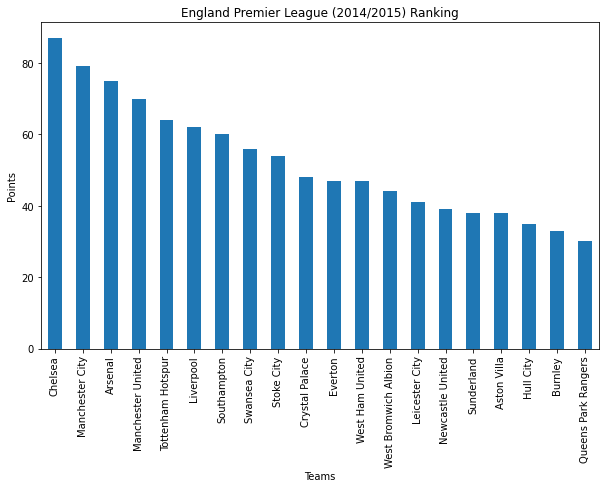

In [43]:
# Let's visualise the points acquired by each team for the season in a bar plot

df_standing['Pts'].plot(kind='bar', figsize=(10, 6))
plt.ylabel('Points')
plt.xlabel('Teams')
plt.title('England Premier League (2014/2015) Ranking')
plt.show()

#### Inference
We see that Chelsea topped the England Premier League in the 2014/2015 season accumulating over 80 Points

#### That's all good but lets take it a step further by wrapping this in a function and viewing some more details

### Research Question 2
#### 2a  (Which teams won the various leagues in given season)
#### 2b  (Other ranking - most goals scored, most goals conceded, goals aggregation)

Here I'll explore other means of team ranking like goals scored, goals conceded, goals difference.
And then we'll visualise these on a graph

In [44]:
def evaluate(df):
    '''
    Plots graph for the point ranking,
                        goals scored ranking,
                        goals conceded ranking,
                        goal difference.
    '''
    fig, axes = plt.subplots(2, 2, figsize=(15, 12), constrained_layout=True)
    views = ['Pts', 'GF', 'GA', 'GD']
    ticks = [str(x) for x in range(df.shape[0])]
    
    # loop through the different axes
    # sort the dataframe in ascending order
    # and then plot a bar plot
    for ax, view in zip(axes.flatten(), views):
        df.sort_values(view, ascending=False, inplace=True)
        ax.bar(ticks, df[view])
        ax.set_xticklabels(labels=df.index, rotation=90)
        ax.set_ylabel(view)
        ax.set_xlabel('Team Names')

    # set the title of the various plots
    axes[0, 0].set_title('Points Ranking')
    axes[0, 1].set_title('Most Effective Attack (Goals Scored)')
    axes[1, 0].set_title('Weakest Defence (Goals Conceded)')
    axes[1, 1].set_title('Goals Difference')

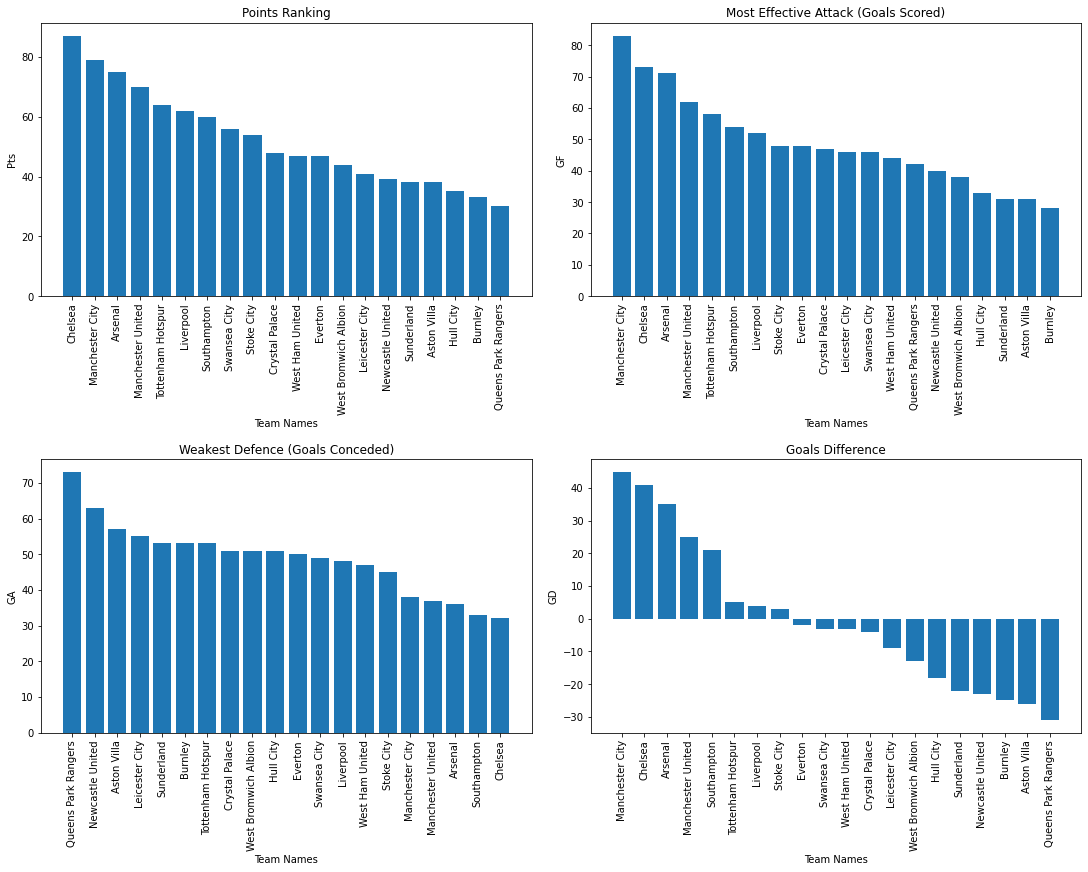

In [45]:
# let's test our evaluation function on our league table
evaluate(df_standing)

#### Inference
We see that while Chelsea amassed the most points and conceded the least number of goals, Manchester City scored the most goals in the season and had the highest goal difference

### Research Question 3 (Compare Champions of various leagues for given season - Clash of Champions)

Here I'll compare league leaders accross all the leagues with plots. Evaluation parameters are (matches won, matches drawn, matches lost, goals-scored, goals-conceded, goal-difference)


In [46]:
def CoC(season):
    '''
    Clash of Champions
    '''
    leagues = list(df_league.name)
    df = pd.DataFrame(columns=['MP', 'W', 'D', 'L', 'Pts', 'GF', 'GA', 'GD']) # the dataframe
    for league in leagues:
        standing = show_table(league, season)
        df = df.append(standing.iloc[0]) # appending just the league leadet to the dataframe
        
    fig, axes = plt.subplots(4, 2, figsize=(12, 18), constrained_layout=True) 
    views = ['Pts', 'W', 'D', 'L', 'GF', 'GA', 'GD']
    ticks = [str(x) for x in range(df.shape[0])]
    
    for ax, view in zip(axes.flatten(), views):
        df.sort_values(view, ascending=False, inplace=True)
        ax.bar(ticks, df[view])
        ax.set_xticklabels(labels=df.index, rotation=90)
        ax.set_ylabel(view)
        ax.set_xlabel('Team Names')
        
    axes[0, 0].set_title('Points Ranking')
    axes[0, 1].set_title('Games won')
    axes[1, 0].set_title('Games drawn')
    axes[1, 1].set_title('Games lost')
    axes[2, 0].set_title('Most Effective Attack (Goals Scored)')
    axes[2, 1].set_title('Weakest Defence (Goals Conceded)')
    axes[3, 0].set_title('Goals Difference')
    

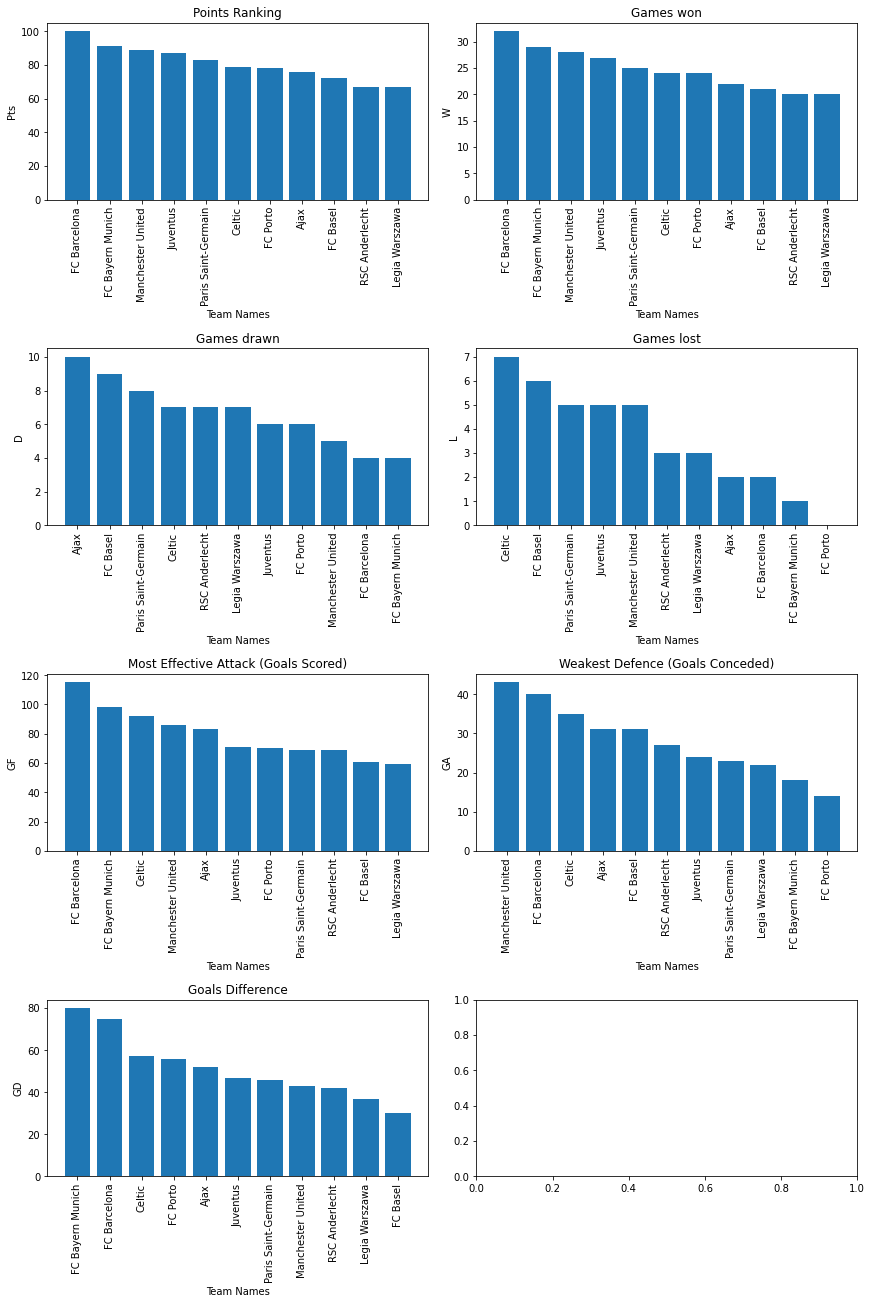

In [47]:
# Let's visualize this for the 2012/2013 season
CoC('2012/2013')

#### Inference
We see that in our Clash of Champions:
- FC Barcelona had the most points, won the most games and scored the most games
- FC Porto did not loose a single game the entire season
- Manchester United conceded the most goals
- FC Bayern Munich had the highest goal difference

We can check for more seasons by calling the CoC function and inputing the required sesason as a parameter

We can see the various seasons contained in our dataset like so-
`df_match.season.unique()`

### Research Question 4 (Goal / Assists Ranking for Teams)

I rank the players in a given team by number of goals scored and assists recorded for a particular season.

I'll  make use of the python xml library as some of the text in the dataset is in xml

NOTE: Player1 >> Goal scorer,,,
      Player2 >> Assists maker

In [48]:
def team_goal_rank(team, season):
    '''
    Return goal ranking for given team in specified season
    '''
    team_id = df_team.query(f'team_long_name == "{team}"').team_api_id.values[0] # get id for given team name
    # query the match table to get sub dataframe of all matches played by given team in given season
    df_m = df_match.query(f'(home_team_api_id == {team_id} or away_team_api_id == {team_id}) and season == "{season}"')
    
    goal_rank = {'player_id': [], 'goals': [], 'assists':[]}
    for text in df_m['goal']:
        tree = ET.fromstring(text)      # Use the xml library to read the xml text
        goals = tree.findall('value')
        if goals:
            for goal in goals:
                # bunch of if statement just to make sure we're not including own goals and near misses
                if int(goal.find('team').text) == team_id and goal.find('comment').text not in ['npm', 'dg', 'o'] and goal.find('stats'):
                    scorer = int(goal.find('player1').text)  # Player1 is the goal scorer's id
                    if scorer in goal_rank['player_id']:
                        idx = goal_rank['player_id'].index(scorer)
                        goal_rank['goals'][idx] += 1
                    else:
                        goal_rank['player_id'].append(scorer)
                        goal_rank['goals'].append(1)
                        goal_rank['assists'].append(0)
                        
                    assist = goal.find('player2')           # Player2 is the id of whomever gave the assist
                    if assist is not None:
                        assist = int(assist.text)
                        if assist in goal_rank['player_id']:
                            idx = goal_rank['player_id'].index(assist)
                            goal_rank['assists'][idx] += 1
                        else:
                            goal_rank['player_id'].append(assist)
                            goal_rank['goals'].append(0)
                            goal_rank['assists'].append(1)
                        
    goal_rank = pd.DataFrame(goal_rank)
    goal_rank = pd.merge(goal_rank, df_player, left_on='player_id', right_on='player_api_id')
    goal_rank.sort_values(['goals', 'assists'], ascending=False, inplace=True)
    goal_rank.set_index('player_name', inplace=True)
    
    return goal_rank

In [49]:
# Function Test 1
# let's see Chelsea's goal ranking in the 2012/2013 season
che13 = team_goal_rank('Chelsea', '2012/2013')
che13

,player_id,goals,assists,id,player_api_id,player_fifa_api_id,birthday,height,weight
player_name,,,,,,,,,
Frank Lampard,30631,15,1,3544,30631,5471,1978-06-20,182.88,196
Juan Mata,41468,12,12,5447,41468,178088,1988-04-28,170.18,139
Eden Hazard,107417,9,11,2838,107417,183277,1991-01-07,172.72,163
Fernando Torres,30853,8,6,3335,30853,49369,1984-03-20,185.42,172
Branislav Ivanovic,31306,5,1,1365,31306,178372,1984-02-22,185.42,201
Ramires,79574,5,1,8788,79574,184943,1987-03-24,180.34,154
Oscar,128864,4,5,8203,128864,188152,1991-09-09,177.80,148
John Terry,30627,4,0,5120,30627,13732,1980-12-07,187.96,198
Gary Cahill,23783,2,2,3674,23783,164468,1985-12-19,193.04,190


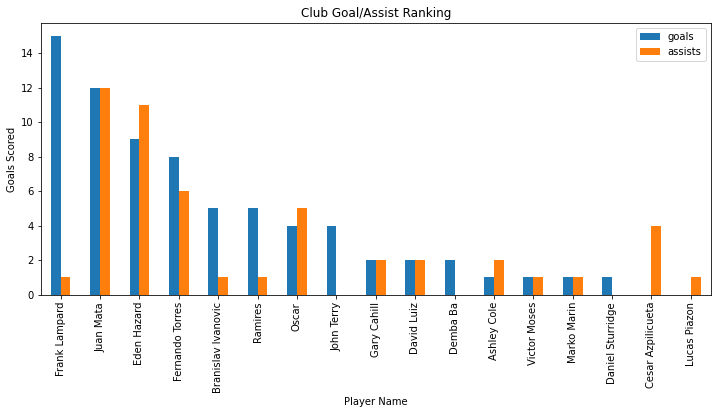

In [50]:
# let's visualise the table above
che13.groupby(['player_name'])['goals', 'assists'].head().plot(kind='bar', figsize=(12,5));
plt.ylabel('Goals Scored')
plt.xlabel('Player Name')
plt.title('Club Goal/Assist Ranking')
plt.legend()
plt.show()

#### Inference
From the graph, Frank Lampard scored the most goals for Chelsea and Juan Mata hadthe highest assists in the 2012/2013 season

In [51]:
# Test 2
# Let's see Real Madrid CF's goal rankings in the 2015/2016 season
md16 = team_goal_rank('Real Madrid CF', '2015/2016')
md16

,player_id,goals,assists,id,player_api_id,player_fifa_api_id,birthday,height,weight
player_name,,,,,,,,,
Cristiano Ronaldo,30893,35,11,1995,30893,20801,1985-02-05,185.42,176
Karim Benzema,26166,24,7,5636,26166,165153,1987-12-19,187.96,174
Gareth Bale,31921,19,10,3660,31921,173731,1989-07-16,182.88,163
James Rodriguez,164684,7,8,4599,164684,198710,1991-07-12,180.34,165
Jese Rodriguez,281085,5,6,4905,281085,202515,1993-02-26,177.80,161
Lucas Vazquez,359193,4,6,6299,359193,208618,1991-07-01,172.72,152
Isco,191315,3,7,4410,191315,197781,1992-04-21,175.26,163
Danilo,208077,2,5,2217,208077,199304,1991-07-15,182.88,172
Luka Modric,31097,2,4,6389,31097,177003,1985-09-09,175.26,143


##### now lets visualise this in a plot

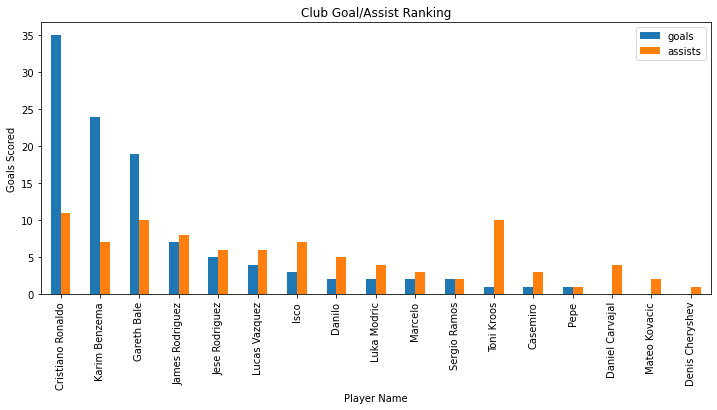

In [52]:
md16.groupby(['player_name'])['goals', 'assists'].head().plot(kind='bar', figsize=(12,5));
plt.ylabel('Goals Scored')
plt.xlabel('Player Name')
plt.title('Club Goal/Assist Ranking')
plt.legend()
plt.show()

#### Inference
From the graph, Cristiano Ronaldo scored the most goals and had the highest assist for Real Madrid in the 2015/2016 season

### Research Question 5 (Goal ranking for each League - Golden boot race)

Let's visualise the goal ranking for the entire league season

Just like in the previous question, I make use of the xml library to read xml files. This time I do not take goal assists into account

In [53]:
def golden_boot(league, season):
    '''
    Return overall goal ranking for given league in specified season
    '''
    df = pd.merge(df_match, df_league, on='country_id')
    df.query(f'name == "{league}" and season == "{season}"', inplace=True)
    
    goal_rank = {'player_id': [], 'goals': []}
    for text in df['goal']:
        tree = ET.fromstring(text)
        goals = tree.findall('value')
        if goals:
            for goal in goals:
                if goal.find('comment').text not in ['npm', 'dg', 'o'] and goal.find('stats'):
                    scorer = int(goal.find('player1').text)
                    if scorer in goal_rank['player_id']:
                        idx = goal_rank['player_id'].index(scorer)
                        goal_rank['goals'][idx] += 1
                    else:
                        goal_rank['player_id'].append(scorer)
                        goal_rank['goals'].append(1)
                        
    goal_rank = pd.DataFrame(goal_rank)
    goal_rank = pd.merge(goal_rank, df_player, left_on='player_id', right_on='player_api_id')
    goal_rank.sort_values('goals', ascending=False, inplace=True)
    goal_rank.set_index('player_name', inplace=True)
    
    return goal_rank

In [54]:
# Let's see the individual goal ranking for the England Premier League in the 2015/2016 season
premier_16 = golden_boot('England Premier League', '2015/2016').head(20)
premier_16

,player_id,goals,id,player_api_id,player_fifa_api_id,birthday,height,weight
player_name,,,,,,,,
Harry Kane,194165,25,4142,194165,202126,1993-07-28,187.96,143
Jamie Vardy,286119,24,4623,286119,208830,1987-01-11,177.80,161
Sergio Aguero,37412,24,9674,37412,153079,1988-06-02,172.72,163
Romelu Lukaku,181276,18,9202,181276,192505,1993-05-13,190.50,207
Riyad Mahrez,278343,17,9000,278343,204485,1991-02-21,177.80,137
Olivier Giroud,46469,16,8137,46469,178509,1986-09-30,193.04,194
Jermain Defoe,30348,15,4871,30348,50542,1982-10-07,170.18,154
Odion Ighalo,101419,15,8084,101419,185195,1989-06-16,177.80,170
Alexis Sanchez,50047,13,501,50047,184941,1988-12-19,170.18,137


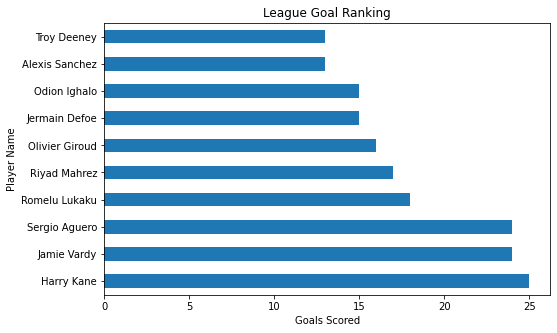

In [55]:
# for the top 10 goal scorers
premier_16['goals'].head(10).plot(kind='barh', figsize=(8,5))
plt.xlabel('Goals Scored')
plt.ylabel('Player Name')
plt.title('League Goal Ranking')
plt.show()

#### Inference
We see Harry Kane won the race for the golden boot in the season, closely followed by Jamie Vardy and Sergio Aguero

In [56]:
# Let's see the individual goal ranking for the Spanish League in the 2015/2016 season
liga_16 = golden_boot('Spain LIGA BBVA', '2015/2016').head(20)
liga_16

,player_id,goals,id,player_api_id,player_fifa_api_id,birthday,height,weight
player_name,,,,,,,,
Luis Suarez,40636,40,6377,40636,176580,1987-01-24,182.88,187
Cristiano Ronaldo,30893,35,1995,30893,20801,1985-02-05,185.42,176
Lionel Messi,30981,26,6176,30981,158023,1987-06-24,170.18,159
Neymar,19533,24,7867,19533,190871,1992-02-05,175.26,150
Karim Benzema,26166,24,5636,26166,165153,1987-12-19,187.96,174
Antoine Griezmann,184138,22,868,184138,194765,1991-03-21,175.26,148
Aritz Aduriz,33028,20,945,33028,106231,1981-02-11,182.88,172
Gareth Bale,31921,19,3660,31921,173731,1989-07-16,182.88,163
Ruben Castro,96652,19,9267,96652,115909,1981-06-27,175.26,159


#### Let's visualise the race for the golden boot

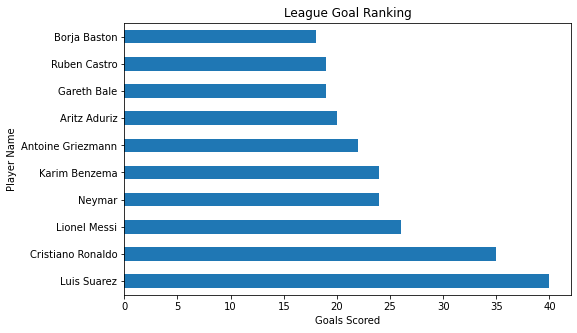

In [57]:
# for the top 10 goal scorers
liga_16['goals'].head(10).plot(kind='barh', figsize=(8,5))
plt.xlabel('Goals Scored')
plt.ylabel('Player Name')
plt.title('League Goal Ranking')
plt.show()

#### Inference
We see that in the 2015/2016 season, Luis Suarez scored the most goals followed by Cristiano Ronaldo and then Lionel Messi

### Research Question 6 (Rating Teams by Specified Attributes)

**Steps I take:**
- Merge the Team Attributes table with the Teams table to have the team names along side their attributes.
- Group by team name and date and pick out only the specified attribute
- Sort from highest to lowest by specified attribute averaged over the years present.
- plot the top 10 teams rating by just that singular attribute

NOTE: All of these steps are wrapped in a function

In [58]:
def single_attr_rank(attr):
    '''
    Plots graph ranking teams by specified columns
    '''
    df_tat = pd.merge(df_team, df_team_attr, on='team_api_id')
    grouped = df_tat.groupby(['team_long_name', 'date'])
    grouped_df = grouped[attr].mean().unstack()
    grouped_df['agg'] = grouped_df.mean(axis=1)
    try:
        dropped = grouped_df.dropna()
        dropped.sort_values(by='agg', ascending=False).head(10).plot(kind='bar', figsize=(12,8))
    except IndexError:
        plt.close('all')
        grouped_df.sort_values(by='agg', ascending=False).head(10).plot(kind='bar', figsize=(12,8))
    plt.ylabel(attr)
    plt.xlabel('Team Name')
    plt.title(f'Ranking Teams by {attr}')

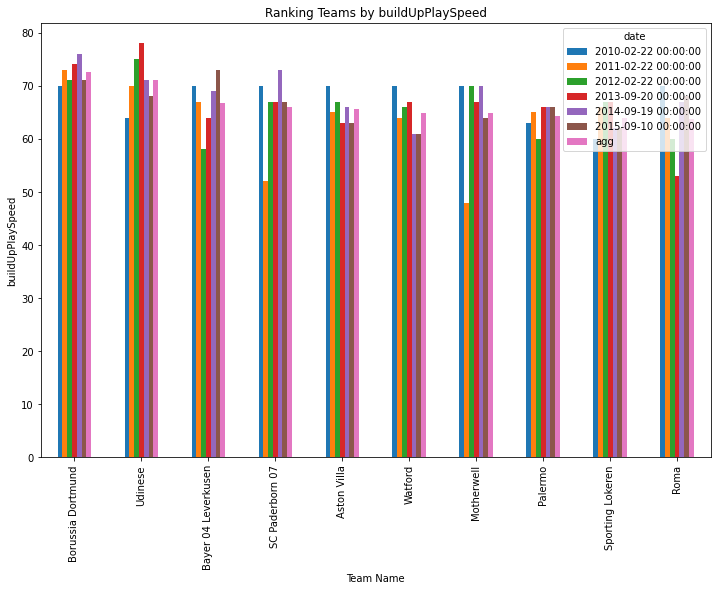

In [59]:
# select a team attribute and call the above function on that attribute
# to rank teams over the years based on that attribute
column = 'buildUpPlaySpeed'
single_attr_rank(column)

#### Inference
From the above graph we see that Borussia Dortmund has had the best build up play speed over the years

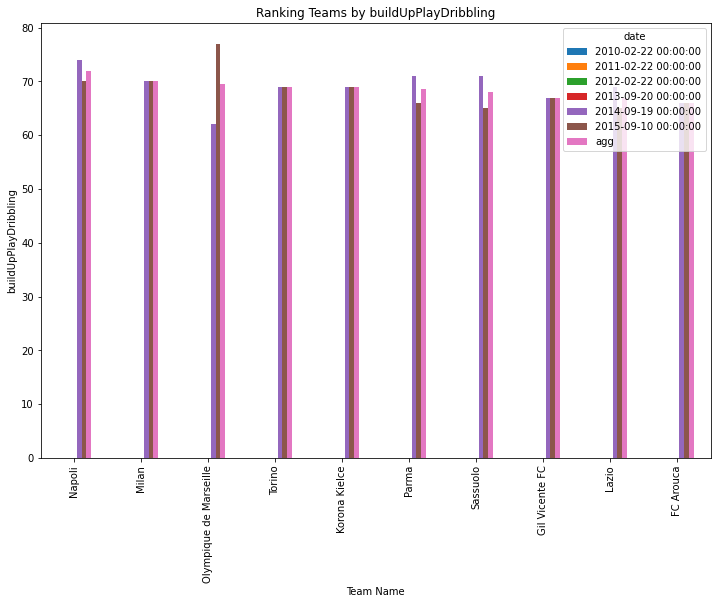

In [60]:
# Let's try that again but for a different attribute
column = 'buildUpPlayDribbling'
single_attr_rank(column)

#### Inference
From the above plot we see Napoli had the best build up play dribbling over the years

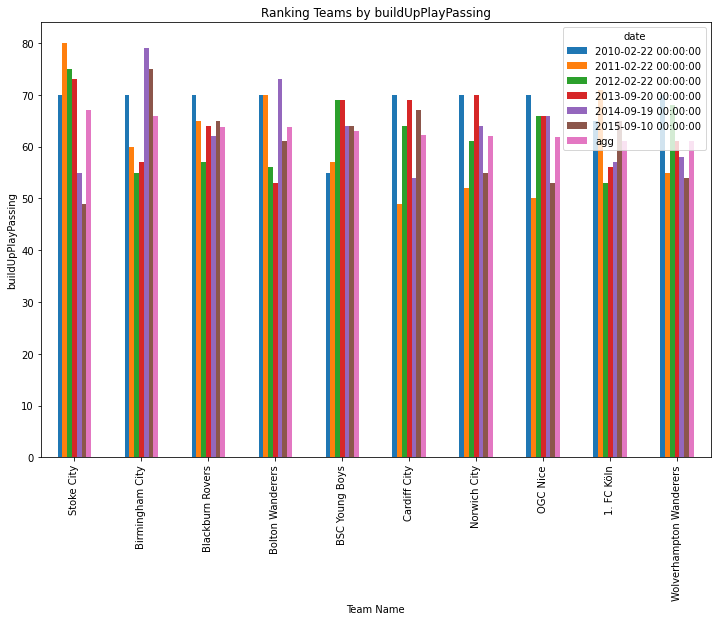

In [61]:
# Again
column = 'buildUpPlayPassing'
single_attr_rank(column)

#### Inference
Stroke City had the best build up play passing over the years

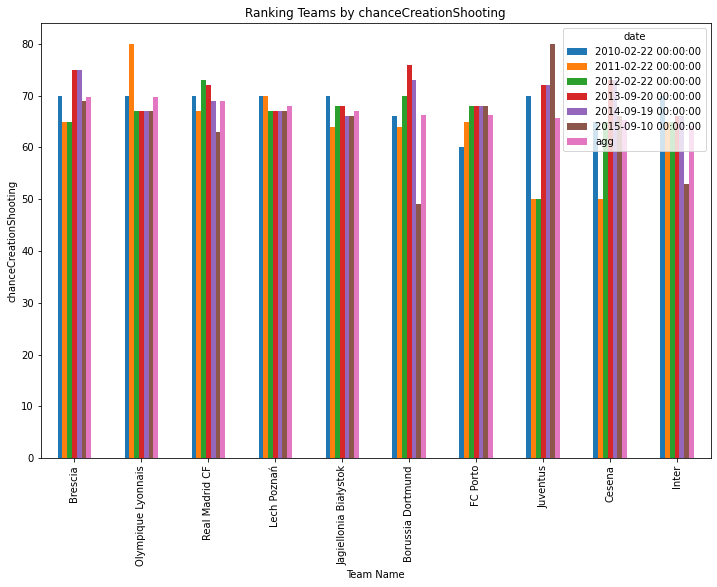

In [62]:
# And again
column = 'chanceCreationShooting'
single_attr_rank(column)

#### Inference
Brescia Had the best chance creation for shooting over the years, Lyon had the second best and Real Madrid the third best

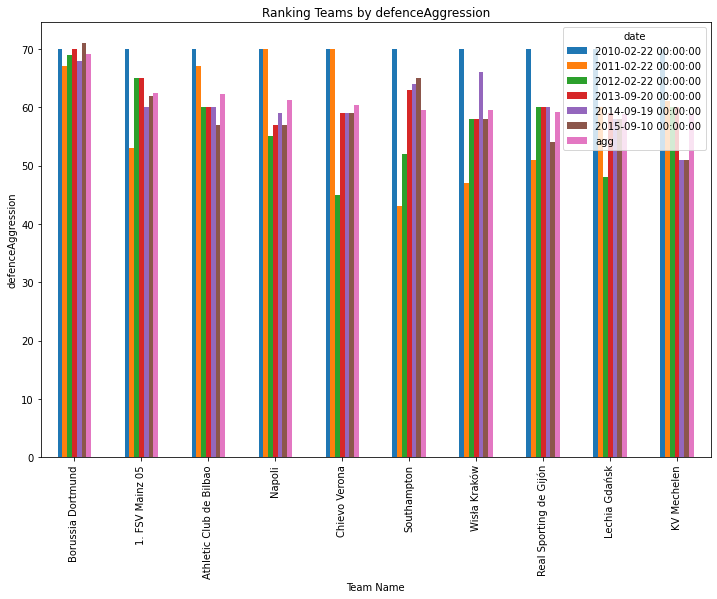

In [63]:
# For the final time
column = 'defenceAggression'
single_attr_rank(column)

#### Inference
Dortmund had the most aggressive defence over the years

<a id='conclusions'></a>
## Conclusions

1) **Research Questions 1&2:** I've been able to design a simple function that builds a ranking table for each league that shows the most successful clubs for the season. I also used graphs to evaluate teams performance on several parameters. For instance, in the 2014/2015 season:
- Chelsea amassed the most points to top the England Premier League.
- Manchester City had the most effective attack as they scored more goals than any other side in the league
- Queens Park Rangers had the weakest defence as they conceded the most goals.
- Conversely, Chelsesa had the strongest defence as they conceded lesser goals than any other side.
- Ultimately, Manchester City had the highest goal difference, but that wasn't enough to earn them the league title

2) **Research Question 3:** I tried ranking top teams from the various leagues based on performance rather than team attributes, so I place them side by side with each other visualizing based on points amassed, wins, draws, losses, goals-scored, goals-conceded, goal-difference. Comparing league winners in the 2012/2013 season:
- FC Barcelona amassed the most points overall
- FC Barcelona won the most games
- Celtic lost the most number of games
- FC Porto seems to not have lost any games the entire season
- FC Barcelona had the most effective attack as they scored the most goals
- Manchester United had the weakest defence amongst the leaders as they conceded the most goals
- FC Bayern Munich had the highest goal difference

3) **Research Question 4&5:** I've successfully built a function to evaluate and plot individual goal ranking and assist for each club. For my demonstration I visualize the goal/assist ranking for Real Madrid CF in the 2015/2016 season. I've also designed a somewhat similar function to evaluate the overall goal ranking for a given league at a particular season(in my demonstration, the Spanish League in the 2015/2016).
- Cristiano Ronaldo tops the team leaderboard on both goals and assists.
- Luis Suarez tops the League leader-board on goals for the season just ahead of Ronaldo and win's the golden boot

4) **Research Question 6:** I created a function to plot a visual representation ranking teams based on specified team attribute. For some test cases I ran, here are the results
- Borussia Dortmund has had the best build up play speed over the years
- Napoli had the best build up play dribbling over the years
- Stroke City had the best build up play passing over the years
- Brescia Had the best chance creation for shooting over the years, Lyon had the second best and Real Madrid the third best
- Dortmund had the most aggressive defence over the years


### Additional information that could have been helpful
Information of results from head to head matches in other competitions between clubs across different leagues would help in general  club ranking


### Limitations
Research Question 3 is a poor aggregation of team ranking across different leagues because some Leagues are more competitive than others, so some of the teams considered in the overall team ranking analysis (teams who topped their various leagues) have had to go up against more difficult sides than some others.


#### Other Research that can be conducted
    1. What team attributes led to the most victories
    2. Which players had the most penalties
    3. Which teams have remained at the top over the years in specific leagues
    4. What teams have remained in the top-flight over the years